# CODING RAJA TECHNOLOGIES

### DATA SCIENCE INTERNSHIP

### TASK - 2 :- Develop a machine learning model to detect fraudulent transactions in a financial dataset.

## To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud. For this task, I collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. Below are all the columns from the dataset I’m using here:

### 1. step: represents a unit of time where 1 step equals 1 hour
### 2. type: type of online transaction
### 3. amount: the amount of the transaction
### 4. nameOrig: customer starting the transaction
### 5. oldbalanceOrg: balance before the transaction
### 6. newbalanceOrig: balance after the transaction
### 7. nameDest: recipient of the transaction
### 8. oldbalanceDest: initial balance of recipient before the transaction
### 9. newbalanceDest: the new balance of recipient after the transaction
### 10. isFraud: fraud transaction

### I hope you now know about the data I am using for the online payment fraud detection task. Now in the section below, I’ll explain how we can use machine learning to detect online payment fraud using Python.

In [96]:
 #import the necessary libraries
   
 # For Data Analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
# Load the data set
data = pd.read_csv("fraud_data.csv")

In [98]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [99]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [100]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [102]:
data.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179861,833883,855113,1100701,1224996,0,0
std,142,603858,2888242,2924048,3399180,3674128,0,0
min,1,0,0,0,0,0,0,0
25%,156,13389,0,0,0,0,0,0
50%,239,74871,14208,0,132705,214661,0,0
75%,335,208721,107315,144258,943036,1111909,0,0
max,743,92445516,59585040,49585040,356015889,356179278,1,1


In [103]:
#Missing values

data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [104]:
#Now, let’s have a look at whether this dataset has any null values or not:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


 So this dataset does not have any null values. Before moving forward, now, let’s have a look at the type of transaction mentioned in the dataset:

In [105]:
#we have all 0s & 1s in our Target Feature and its a binary classification problem
data['isFraud'].unique()

array([0, 1], dtype=int64)

In [106]:
# checking whether the data is balanced or not. 
# and it seems the dataset is imbalanced, so to deal with imbalanceness we will introduce class_weights while building the model

data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [107]:
# Exploring transaction type
print(data.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


C:\Users\Sumit07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


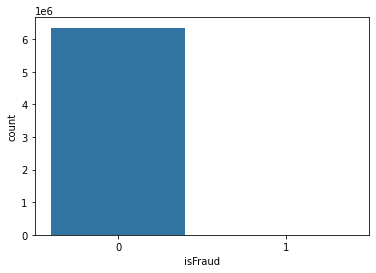

In [108]:
# Visualizing the distribution of the Target variable

sns.countplot(data['isFraud'])
plt.show()

<AxesSubplot:title={'center':'missing data visualization in the dataset'}>

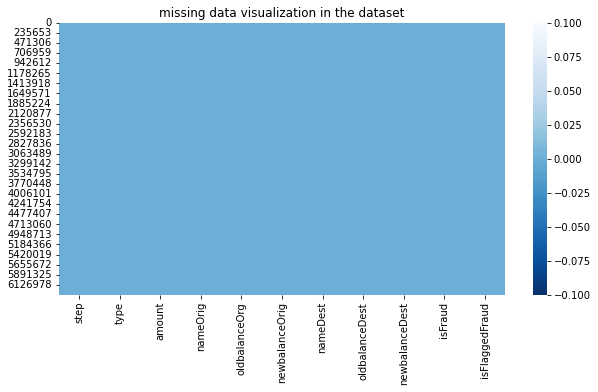

In [109]:
# To visualize the missing values

plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(data.isnull(), cbar =True, cmap= "Blues_r")

## There is no missing values in the dataset 

In [110]:
#check shape of the entire dataframe using .shape attribute
data.shape

(6362620, 11)

In [111]:
# non fradulent transactions are 

100*(6354407/6362620)

99.87091795518198

Text(0, 0.5, 'count of online transaction type ')

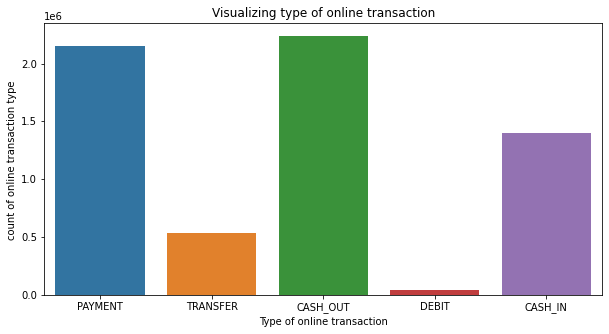

In [112]:
# Univariate Analysis
#visualize type of online transaction
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= data)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

### From the chart, it is seen that cash_out and payment is the most common type of online transaction that customers use

#### Checking for Correlation among the Predictors

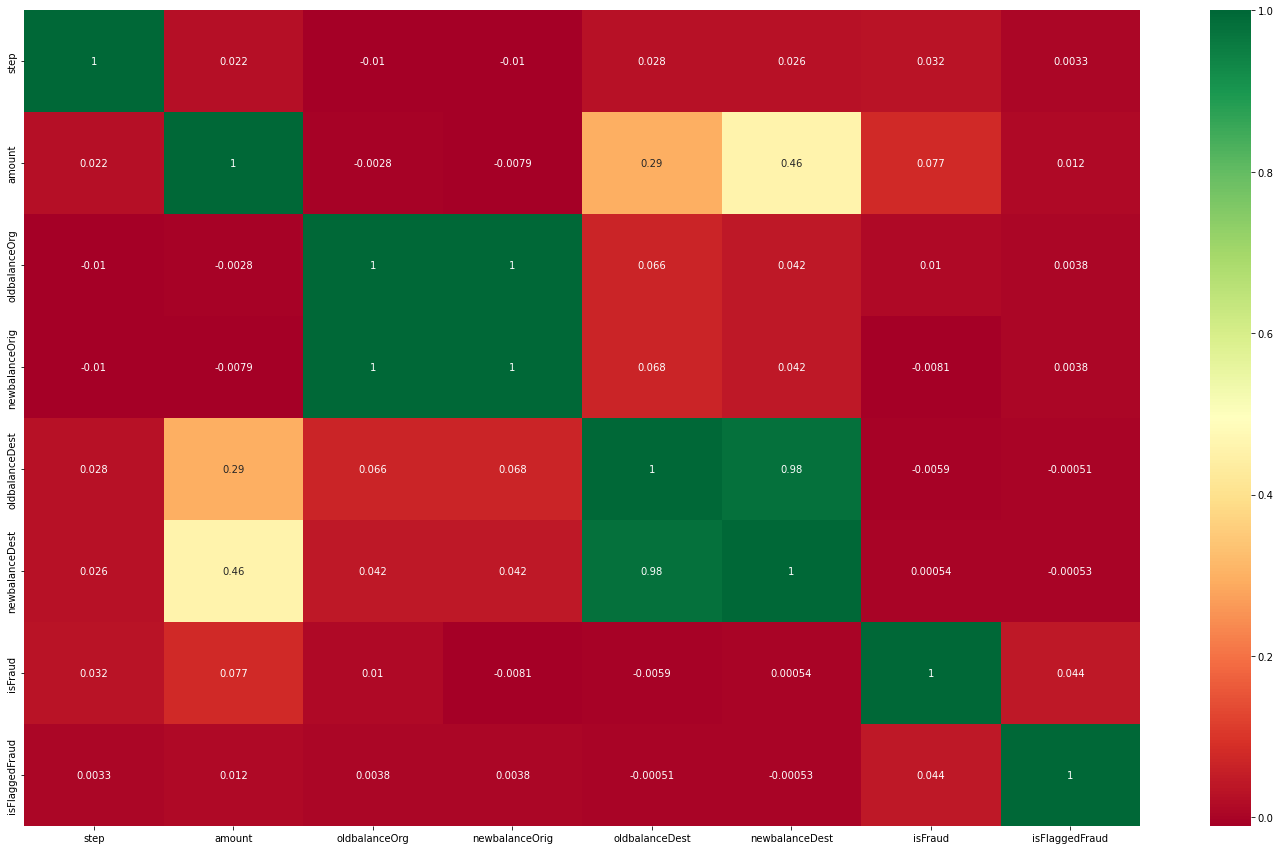

In [113]:
corr = data.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

Here we can observe that there are some independent variables correlated with each other.

1. Input features oldbalanceDest and newbalanceDest are correlated with each other so we had to drop one of the feature. To decide which one to drop amongst them we have to check their correlation with dependent feature (isFraud), oldbalanceDest is highly negatively correlated (-0.0059) with target feature than newbalanceDest (0.00054). here i have to drop the newbalanceDest feature.

2. likewise above oldbalanceOrig and newbalanceOrig are also correlated with each other and newbalanceOrig is highly negatively correlated (-0.0081) with target feature than oldbalanceOrg (0.01). here i have to drop the oldbalanceOrg feature.

now i have to drop newbalanceDest and oldbalanceOrig features from the data

### B] Data Visualization and Exploratory Data Analysis (EDA)


#### a) Visualizing varibales
Plotting Bar Graphs in order to visualize to see the distributions

In [114]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

C:\Users\Sumit07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


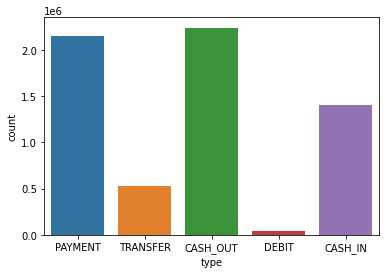

In [115]:
sns.countplot(data['type'])
plt.show()

The most frequent transaction types are CASH-OUT and PAYMENT



#### Fraud Transactions by Transaction Type

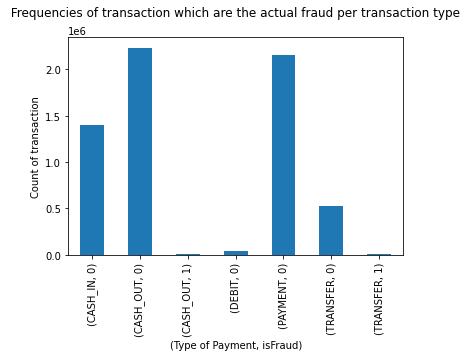

In [116]:
fraud_type = data.groupby(['type', 'isFraud']).size().plot(kind='bar')
fraud_type.set_title(" Frequencies of transaction which are the actual fraud per transaction type \n" )
fraud_type.set_xlabel("(Type of Payment, isFraud)")
fraud_type.set_ylabel("Count of transaction")

plt.show()


#### Split of Fraud Transactions by Transaction Type

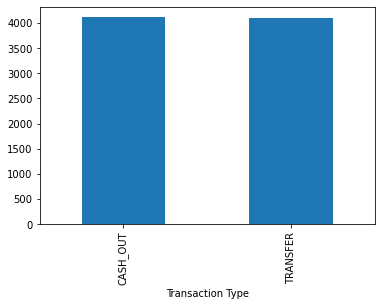

In [117]:
fraud = data['isFraud'].isin([1])

fraud_time = data[fraud].groupby(['type']).size().plot(kind='bar')
fraud_time.set_xlabel("Transaction Type")

plt.show()

The fraudulent transactions are splitted in an equal percentage.

Only CASH-OUT and TRANSFER transactions can be fraudulent.

#### Checking the account balance is matching before transaction and after the transaction for both originator and recipient

In [118]:
print("Are there any mismatch in the balance at origin and destination after transaction?")

data['origBalance_inacc'] = (data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"]).astype(int)
data['destBalance_inacc'] = (data["oldbalanceDest"] + data["amount"] != data["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:",round(data['origBalance_inacc'].value_counts()[1]/data.shape[0] * 100,2))

print("Balance Error(%) at the destination:",round(data['destBalance_inacc'].value_counts()[1]/data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 85.09
Balance Error(%) at the destination: 74.45


#### Checking Whether there is there any Transaction Amounts that are Negative or Zero
we have to check if the amount column is always positive or not ?

In [119]:
print("Number of transactions with amount is less 0?")
print(len(data[data.amount<0]))

print("Number of transactions with amount is equal to 0?")
print(len(data[data.amount==0]))

Number of transactions with amount is less 0?
0
Number of transactions with amount is equal to 0?
16


So there is 16 transacations when the amount is less than zero

### checking about these 16 transactions are of which type of payment methods they used and are they fraudulent trasacntions or not?

In [120]:
print("What type of transactions are they?")
print(data[data.amount<=0]['type'].value_counts())

print("Are all these marked as Fraud Transactions?")
data[data.amount<=0]['isFraud'].value_counts()[1] == len(data[data.amount<=0])

What type of transactions are they?
CASH_OUT    16
Name: type, dtype: int64
Are all these marked as Fraud Transactions?


True

### Checking whether the Flagged transactions are Fraudulent ones or not ?

In [121]:
data_temp = data[data.isFlaggedFraud==1]
print("How many frauds transactions are Flagged?:")
print("\t",len(data_temp))

print("What type of transactions are they?")
print("\t",data_temp['type'].value_counts().index[0])

print("Are all these flagged also marked as Fraud Transactions?")
print("\t",data_temp['isFraud'].value_counts()[1] == len(data_temp))

How many frauds transactions are Flagged?:
	 16
What type of transactions are they?
	 TRANSFER
Are all these flagged also marked as Fraud Transactions?
	 True


therefore, there is an almost equal likelihood that a fraudulent transaction can be CASH_OUT or TRANSFER

All the fraud trnasactions belong to Transfer or Cash-out type, So, iam combinig all the type of payments(PAYMENT, CASH-IN and DEBIT) other than CASH-OUT and TRANSFER as OTHERS.

In [122]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [123]:
type_map = {
    'PAYMENT':'OTHERS',
    'TRANSFER':'TRANSFER',
    'CASH_OUT':'CASH_OUT',
    'DEBIT':'OTHERS',
    'CASH_IN':'OTHERS'
}

In [124]:
data['type'] = data['type'].map(type_map)

data['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

### Fraud and Non-Fraud Transactions Count by Time Step

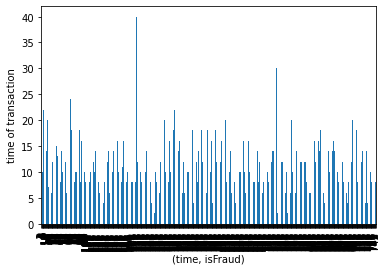

In [125]:
fraud = data['isFraud'].isin([1])

fraud_time = data[fraud].groupby(['step']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.show()

The fraud transactions are almost uniformly spread out across time steps, so this variable is not giving us any information which might impact the target variable. so its better to drop this variable

### Train-Test Split

In [126]:
# deleting the unnecessary varibles from input data

X = data.drop(columns=['step', 'newbalanceDest','oldbalanceOrg','nameOrig','nameDest','isFlaggedFraud','isFraud'])

X.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc
0,OTHERS,9839.64,160296.36,0.0,0,1
1,OTHERS,1864.28,19384.72,0.0,0,1
2,TRANSFER,181.00,0.00,0.0,0,1
3,CASH_OUT,181.00,0.00,21182.0,0,1
4,OTHERS,11668.14,29885.86,0.0,0,1


In [127]:
y = data['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [128]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

# C] Data Preprocessing

In [129]:
data.drop(['newbalanceDest', 'newbalanceOrig', 'nameOrig', 'nameDest'], axis = 1, inplace = True)

Then we move on to one hot encoding our categorical variable type:

In [130]:
data = pd.get_dummies(data, columns=['type'], prefix=['type'])
data.dtypes

step                   int64
amount               float64
oldbalanceOrg        float64
oldbalanceDest       float64
isFraud                int64
isFlaggedFraud         int64
origBalance_inacc      int32
destBalance_inacc      int32
type_CASH_OUT          uint8
type_OTHERS            uint8
type_TRANSFER          uint8
dtype: object

We now need to normalize our data to scale all columns into the same range (except for the categorical features). We will use MinMaxScaler for this:

In [131]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

data_scaled = data.loc[:,~data.columns.isin(['isFraud', 'type_CASH_OUT', 'type_TRANSFER'])]
cols = data_scaled.columns
data_scaled = pd.DataFrame(min_max_scaler.fit_transform(data_scaled))
data_scaled.columns = cols
cols = cols.tolist()
cols.append('isFraud')
cols.append('type_CASH_OUT')
cols.append('type_TRANSFER')

data_scaled_new = pd.DataFrame(columns = [cols])
for i in data_scaled.columns:
    data_scaled_new[i] = data_scaled[i]
    
    
data_scaled_new.reset_index(drop=True, inplace = True)
data.reset_index(drop=True, inplace = True)

for i in ['type_CASH_OUT', 'type_TRANSFER', 'isFraud']:
    data_scaled_new[i] = data[i]

data_scaled_new

,step,amount,oldbalanceOrg,oldbalanceDest,isFlaggedFraud,origBalance_inacc,destBalance_inacc,type_OTHERS,isFraud,type_CASH_OUT,type_TRANSFER
0,0.0,0.000106,0.002855,0.000000,0.0,0.0,1.0,1.0,0,0,0
1,0.0,0.000020,0.000357,0.000000,0.0,0.0,1.0,1.0,0,0,0
2,0.0,0.000002,0.000003,0.000000,0.0,0.0,1.0,0.0,1,0,1
3,0.0,0.000002,0.000003,0.000059,0.0,0.0,1.0,0.0,1,1,0
4,0.0,0.000126,0.000697,0.000000,0.0,0.0,1.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.0,0.0,0.0,0.0,1,1,0
6362616,1.0,0.068272,0.105923,0.000000,0.0,0.0,1.0,0.0,1,0,1
6362617,1.0,0.068272,0.105923,0.000192,0.0,0.0,1.0,0.0,1,1,0
6362618,1.0,0.009195,0.014265,0.000000,0.0,0.0,1.0,0.0,1,0,1


In [132]:
from sklearn.model_selection import train_test_split

X = data_scaled_new.drop(columns='isFraud')
Y = data_scaled_new['isFraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

C:\Users\Sumit07\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [133]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train.values.ravel())
Y_test = label_encoder.fit_transform(Y_test.values.ravel())

Now, we will move on to checking if the class imbalance is the similar in our training and testing sets:

In [134]:
frauds_train = 0
for i in Y_train:
    if i == 1:
        frauds_train += 1

frauds_test = 0
for i in Y_test:
    if i == 1:
        frauds_test += 1

print(f'Class imbalance - TRAIN: {round((frauds_train/len(Y_train) * 100), 3)}%, TEST: {round((frauds_test/len(Y_test) * 100), 3)}%')

Class imbalance - TRAIN: 0.13%, TEST: 0.127%
